In [2]:
import pandas as pd


In [3]:
import os
os.chdir("../")
%pwd

'c:\\ML\\Asteroid-Impact-Prediction'

In [4]:
df = pd.read_csv(r'artifacts\data_ingestion\asteriod_dataset.csv')

In [5]:
df.head()

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,NaN,...,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.346095,40519.173105,NaN,NaN,57298148.0,35603420.0,NaN,...,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,4.557,...,1.966857,2.458120e+06,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,NaN,NaN,NaN,26522368.0,5.093,...,1.527904,2.457902e+06,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,158.646713,61010824.0,NaN,5.154,...,NaN,2.457814e+06,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


In [6]:
df.shape

(4534, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4534 non-null   int64  
 1   Epoch Date Close Approach     3280 non-null   float64
 2   Relative Velocity km per sec  3184 non-null   object 
 3   Relative Velocity km per hr   3033 non-null   float64
 4   Miles per hour                3668 non-null   float64
 5   Miss Dist.(Astronomical)      3933 non-null   float64
 6   Miss Dist.(lunar)             3417 non-null   float64
 7   Miss Dist.(kilometers)        3166 non-null   float64
 8   Miss Dist.(miles)             3882 non-null   float64
 9   Jupiter Tisserand Invariant   2802 non-null   float64
 10  Epoch Osculation              3007 non-null   float64
 11  Semi Major Axis               3346 non-null   float64
 12  Asc Node Longitude            3438 non-null   float64
 13  Per

# EDA

### Check for duplicate records

In [8]:
df.duplicated().sum()

np.int64(0)

### check for null values

In [9]:
(df.isnull().sum()/df.shape[0] * 100).sort_values(ascending=False)

Orbit Uncertainity              38.972210
Jupiter Tisserand Invariant     38.200265
Perihelion Time                 34.494927
approach_month                  33.700926
Epoch Osculation                33.678871
Mean Motion                     33.259815
Relative Velocity km per hr     33.105426
Miss Dist.(kilometers)          30.172034
Relative Velocity km per sec    29.775033
Epoch Date Close Approach       27.657697
Semi Major Axis                 26.202029
Perihelion Arg                  25.011028
Miss Dist.(lunar)               24.636083
Asc Node Longitude              24.172916
Mean Anomaly                    20.247022
Miles per hour                  19.100132
approach_year                   18.063520
Aphelion Dist                   17.975298
Miss Dist.(miles)               14.380238
Miss Dist.(Astronomical)        13.255404
approach_day                    11.976180
Orbital Period                  11.689457
Name                             0.000000
Hazardous                        0

#### Few features are representing the same value in different format, so droing them based on the null values

1. Relative Velocity
    - Droping Relative Velocity km per hr
2. Miss Dist
    - Droping Miss Dist.(lunar), Miss Dist.(kilometers), Miss Dist.(miles)
3. approach_day
    - Dropping approach_year, approach_month 

In [10]:
df = df.drop(columns=["Relative Velocity km per hr", "Miss Dist.(lunar)", "Miss Dist.(kilometers)", "Miss Dist.(miles)", "approach_year", "approach_month"], axis=1)

In [11]:
df.rename(columns={'Relative Velocity km per sec': "Relative Velocity", "Miss Dist.(Astronomical)": "Miss Dist"}, inplace=True)

#### We don't have definetion abour the name column and more over it seems like unique identifier, so dropping the column.

In [12]:
df.drop(columns=['Name'], inplace=True)

#### Dropping most null values columns

In [13]:
df.drop(columns=['Orbit Uncertainity', 'Jupiter Tisserand Invariant', 'Perihelion Time', 'Epoch Osculation', 'Mean Motion'], inplace=True)

In [14]:
df.nunique()

Epoch Date Close Approach     765
Relative Velocity               4
Miles per hour               3668
Miss Dist                    3924
Semi Major Axis              2763
Asc Node Longitude           2829
Perihelion Arg               2817
Aphelion Dist                3014
Mean Anomaly                 2951
approach_day                    4
Orbital Period                  3
Hazardous                       2
dtype: int64

#### from the above unique values clearly it's visible that, we have categorical values.

In [15]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Relative Velocity', 'Orbital Period'], dtype='object')

In [16]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols = [col for col in num_cols if col != "Hazardous"] # removing target column
num_cols

['Epoch Date Close Approach',
 'Miles per hour',
 'Miss Dist',
 'Semi Major Axis',
 'Asc Node Longitude',
 'Perihelion Arg',
 'Aphelion Dist',
 'Mean Anomaly',
 'approach_day']

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Lets visually see how the Hazardous impact the other features.

<Axes: xlabel='Epoch Date Close Approach', ylabel='Count'>

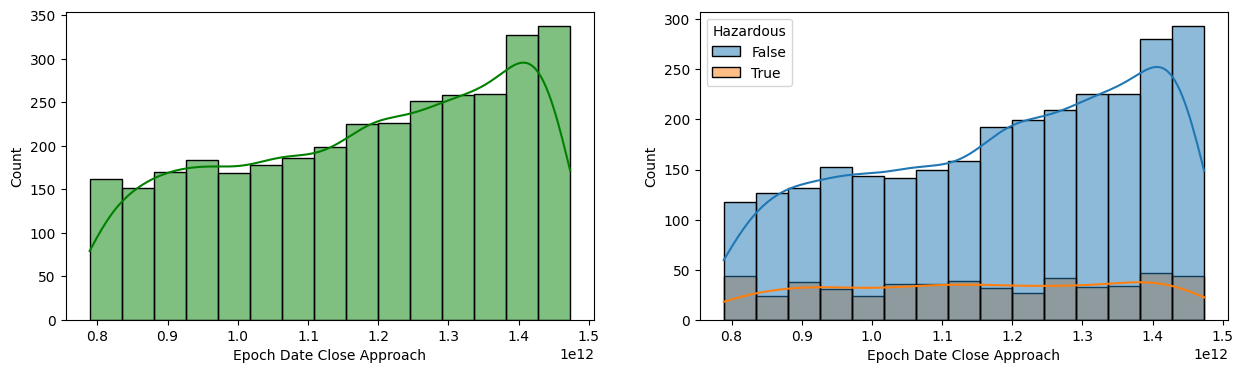

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Epoch Date Close Approach', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Epoch Date Close Approach', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Miles per hour', ylabel='Count'>

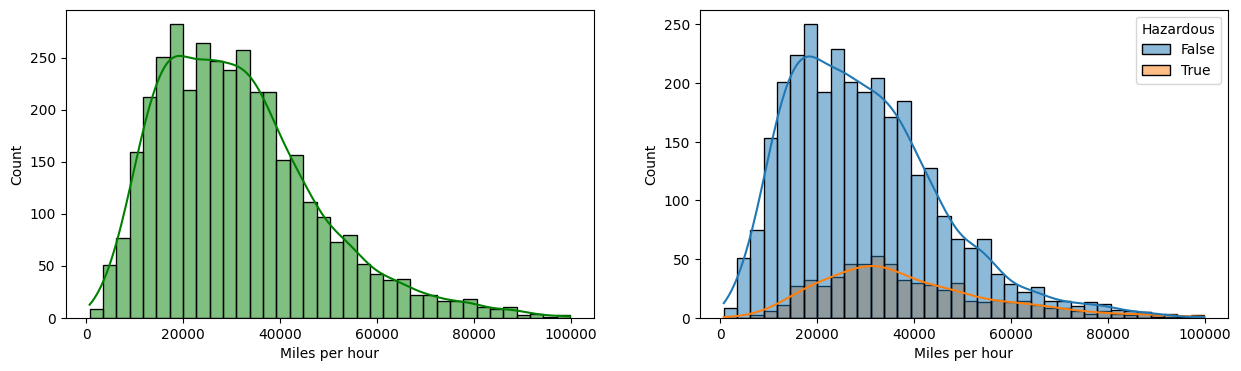

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Miles per hour', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Miles per hour', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Miss Dist', ylabel='Count'>

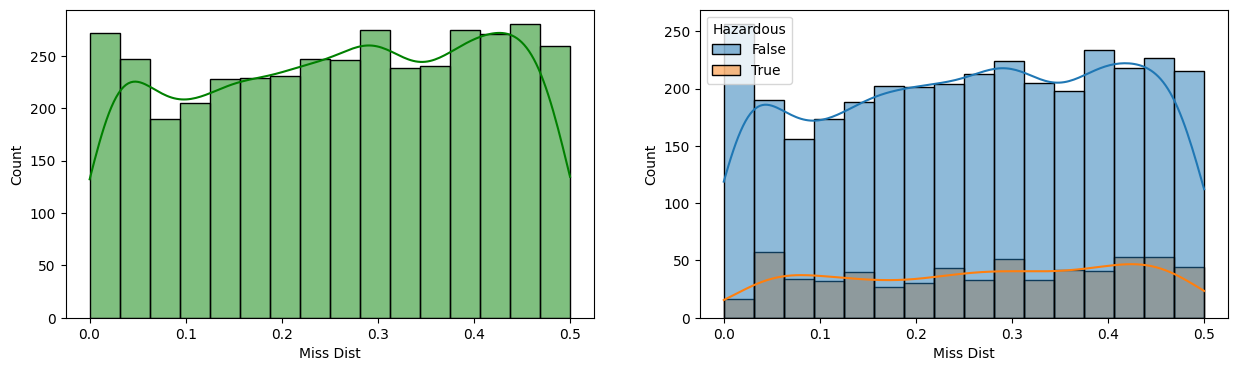

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Miss Dist', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Miss Dist', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Semi Major Axis', ylabel='Count'>

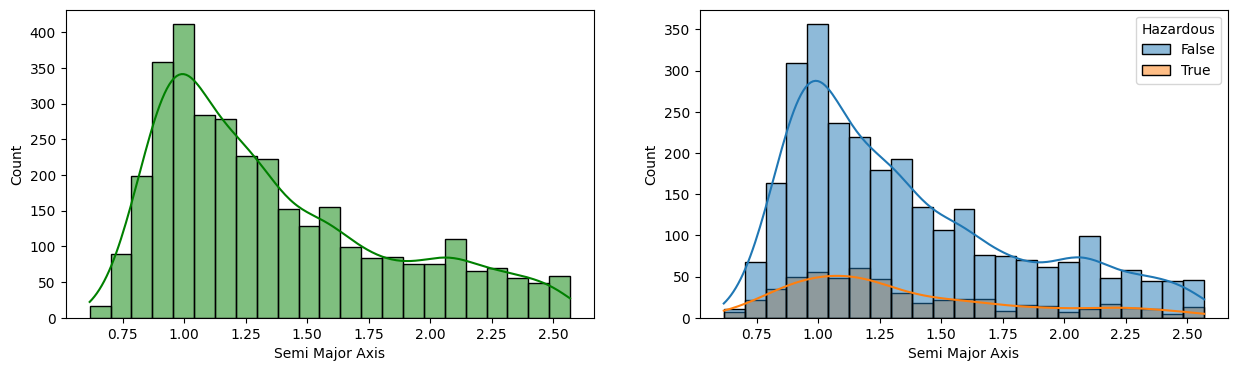

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Semi Major Axis', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Semi Major Axis', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Asc Node Longitude', ylabel='Count'>

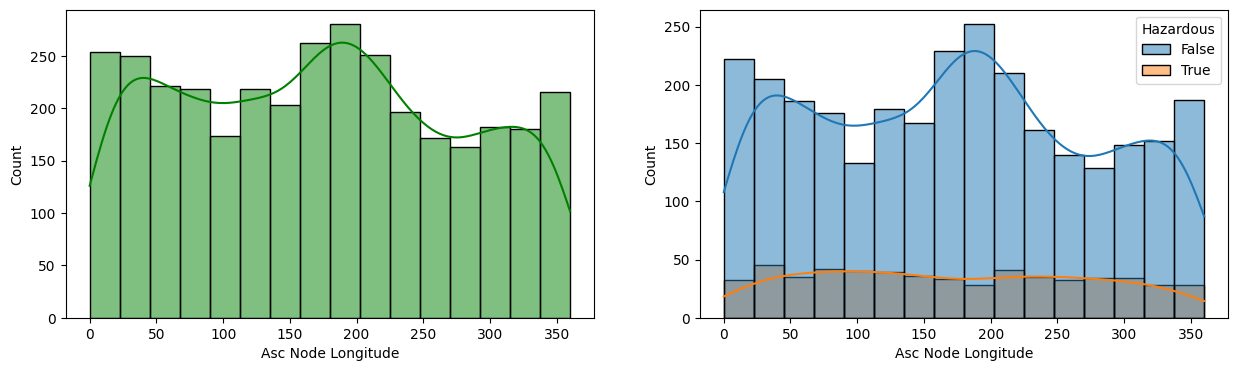

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Asc Node Longitude', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Asc Node Longitude', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Perihelion Arg', ylabel='Count'>

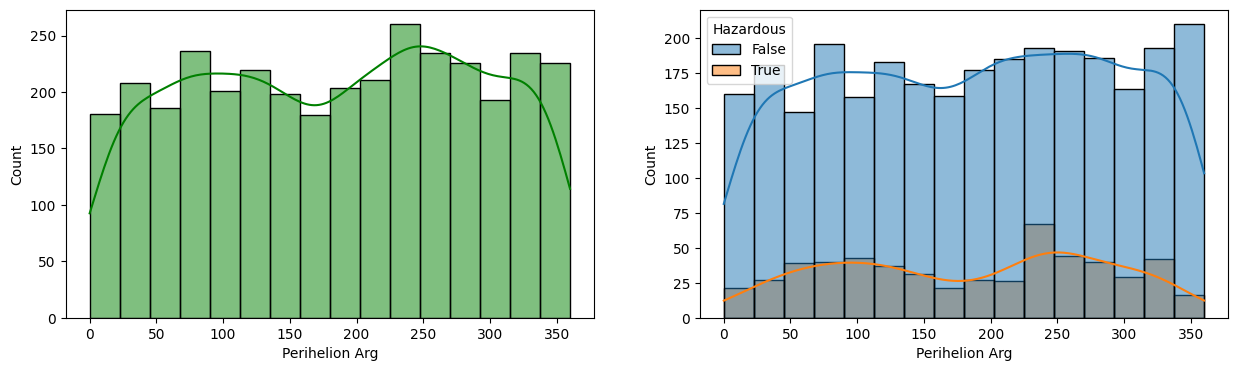

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Perihelion Arg', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Perihelion Arg', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Aphelion Dist', ylabel='Count'>

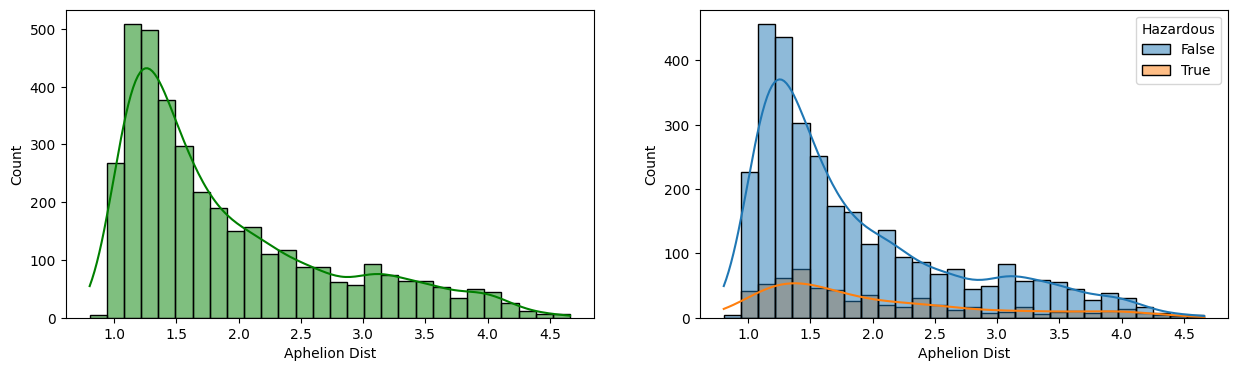

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Aphelion Dist', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Aphelion Dist', kde=True, color='g', hue='Hazardous')

<Axes: xlabel='Mean Anomaly', ylabel='Count'>

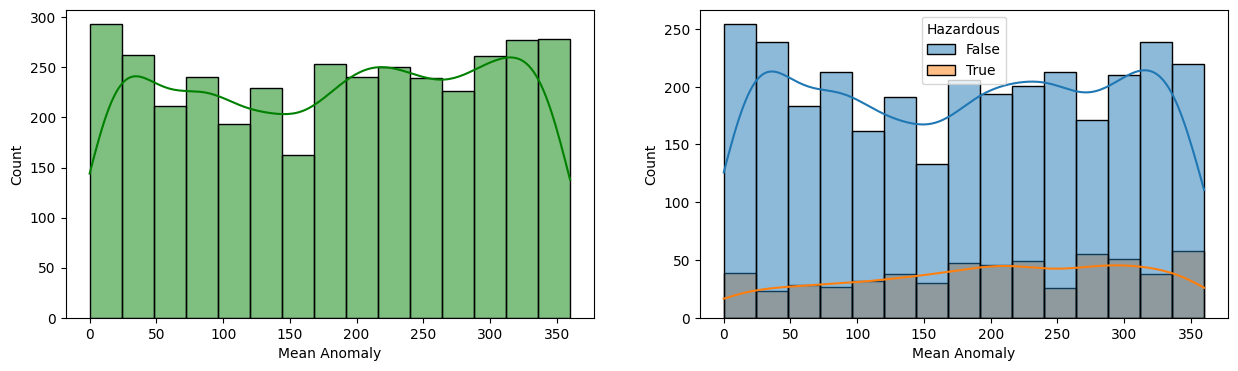

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='Mean Anomaly', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Mean Anomaly', kde=True, color='g', hue='Hazardous')

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Hazardous'], axis=1)
y = df['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Column Transformer

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [28]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("stand_scalar", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot_encoder", OneHotEncoder())
])

In [29]:
col_transformer = ColumnTransformer([
    ("num_cols", num_pipeline, num_cols),
    ("cat_cols", cat_pipeline, cat_cols)
])

In [30]:
X_train_arr = col_transformer.fit_transform(X_train)
X_test_arr = col_transformer.fit_transform(X_test)

# Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [32]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVC": SVC(),
    "K-Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [33]:
scores = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(f"model name: {list(models.keys())[i]}")
    
    model.fit(X_train_arr, y_train)

    y_train_pred = model.predict(X_train_arr)
    y_test_pred = model.predict(X_test_arr)
    # print(y_test_pred)
    scores.append(accuracy_score(y_test, y_test_pred))


model name: Logistic Regression
model name: Random Forest Classifier
model name: SVC
model name: K-Neighbors
model name: Decision Tree


In [39]:
pd.DataFrame(data={"Models": list(models.keys()), "Scores": scores}).sort_values(by="Scores", ascending=False).iloc[0]["Models"]

'Random Forest Classifier'

# Logistic Regression performs very well for this problem.